# A1_노선호_빅데이터2_6일차 (인공신경망,KNN)

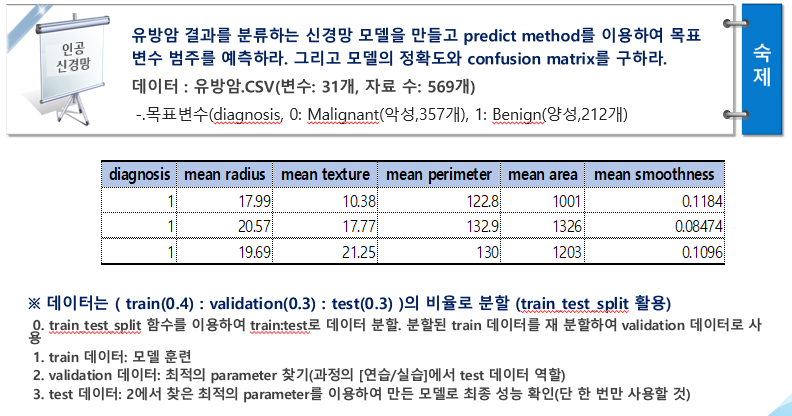

# 종합 모듈 import 

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale,minmax_scale,robust_scale
#%matplotlib inline background 그래프 실행 및 결과 확인
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
#예측
from sklearn.tree import export_graphviz 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#모델 성능 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#confusion matrix
from sklearn.metrics import confusion_matrix

#Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
#주성분 분석
from sklearn.decomposition import PCA
#회귀분석
import statsmodels.api as sm
#RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
#MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
#분류 : KNN
from sklearn.neighbors import KNeighborsClassifier
#로지스틱 회귀
from statsmodels.api import Logit
#데이터 분항
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import os
import graphviz

from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


# 1. 데이터 불러오기

In [29]:
# 실습실경로 df=pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/유방암.csv")
df=pd.read_csv("C:/Users/nsh65/Documents/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/유방암.csv")
df.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
df.isnull().sum()
# 결측값 확인하기  :  결측값 존재하지 않음.

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [31]:
df_x = df.drop("diagnosis",axis=1)
df_y = df['diagnosis']
# 목표변수 및 설명변수로 분리

In [32]:
# train : validation : test = 4:3:3 비율로 나눔
df_train_x, df_test_x,df_train_y,df_test_y = train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
df_train_x,df_val_x,df_train_y,df_val_y = train_test_split(df_train_x,df_train_y,test_size = 3/7,random_state=1234)

In [33]:
# 데이터 셋 4:3:3 비율로 나눈 것을 확인

print(df_train_x.shape)
print(df_train_y.shape)
print(df_val_x.shape)
print(df_val_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(227, 30)
(227,)
(171, 30)
(171,)
(171, 30)
(171,)


#  기본 옵션으로 모델 생성  (스케일링 하기 전후 비교를 위해 스케일링 안하고 모델 생성)

In [34]:
nn_nocustom = MLPClassifier(random_state=1234)

nn_nocustom.fit(df_train_x,df_train_y)
print(" 훈련 데이터 셋 정확도 : {:.3f}".format(nn_nocustom.score(df_train_x,df_train_y)))
print(" 검증 데이터 셋 정확도 : {:.3f}".format(nn_nocustom.score(df_val_x,df_val_y)))

 훈련 데이터 셋 정확도 : 0.934
 검증 데이터 셋 정확도 : 0.912


###  기본 옵션으로 모델 생성 결과 훈련 데이터 셋 정확도는 93.4% 검증 데이터셋 정확도는 91.12% 가 나왔다.
### 성능은 유사하지만 과소 적합이라고 판단하였다.

In [35]:
nn_nocustom

MLPClassifier(random_state=1234)

# MLPClassifier 모델 Hidden layer_sizes 하이퍼파라미터 

In [36]:
train_acc, val_acc = [], [] 
# 학습한 train 정확도와 validation 정확도를 담기위한 리스트 선언
para_hidden = [20* hidden for hidden in range(1,8)]
# 인공신경망 모델에서 사용하는 히든레이어 에 노드를 20부터 140까지 20 단위로 총 7개 리스트컴프리헨션으로 선언

for hidden in para_hidden:
    nn=MLPClassifier(hidden_layer_sizes = hidden, random_state =1234)
    nn.fit(df_train_x, df_train_y)
    train_acc.append(nn.score(df_train_x,df_train_y))
    val_acc.append(nn.score(df_val_x,df_val_y))
# 위에서 선언한 리스트들을 각각 훈련데이터를 이용하여 훈련시키고 리스트에 append를 이용하여 확장시킨다.

df_acc_hidden =pd.DataFrame()
df_acc_hidden["Hidden layer"]=para_hidden
df_acc_hidden["trainAccuarcy"]=train_acc
df_acc_hidden['valacc']=val_acc
# 데이터 저장    

C:\Users\nsh65\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nsh65\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
df_acc_hidden.head()

,Hidden layer,trainAccuarcy,valacc
0,20,0.629956,0.637427
1,40,0.889868,0.871345
2,60,0.938326,0.906433
3,80,0.929515,0.923977
4,100,0.933921,0.912281


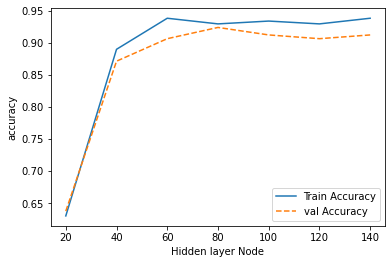

In [38]:
plt.plot(para_hidden,train_acc, linestyle='-', label='Train Accuracy')
plt.plot(para_hidden,val_acc, linestyle='--' , label='val Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Hidden layer Node')
plt.legend()

###  히든레이어 1개를 이용하여 20~ 140 개의 노드를 사용하여 학습한 결과 70개 정도의 노드
### 이후 학습률이 저하되는 것을 그래프로 확인할 수 있었다. 히든레이어 2 개를 사용하여 밑에서 한번 더 테스트 해본다.

In [39]:
train_acc, val_acc = [], [] 
# 학습한 train 정확도와 validation 정확도를 담기위한 리스트 선언
para_hidden = [20* hidden for hidden in range(1,8)]
# 인공신경망 모델에서 사용하는 히든레이어 에 노드를 20부터 140까지 20 단위로 총 7개 리스트컴프리헨션으로 선언

for hidden in para_hidden:
    nn=MLPClassifier(hidden_layer_sizes = (hidden,hidden), random_state =1234)
    nn.fit(df_train_x, df_train_y)
    train_acc.append(nn.score(df_train_x,df_train_y))
    val_acc.append(nn.score(df_val_x,df_val_y))
# 위에서 선언한 리스트들을 각각 훈련데이터를 이용하여 훈련시키고 리스트에 append를 이용하여 확장시킨다.

df_acc_hidden =pd.DataFrame()
df_acc_hidden["Hidden layer"]=para_hidden
df_acc_hidden["trainAccuarcy"]=train_acc
df_acc_hidden['valacc']=val_acc
# 데이터 저장    

In [40]:
df_acc_hidden.head()

,Hidden layer,trainAccuarcy,valacc
0,20,0.925110,0.912281
1,40,0.933921,0.906433
2,60,0.920705,0.918129
3,80,0.898678,0.912281
4,100,0.823789,0.766082


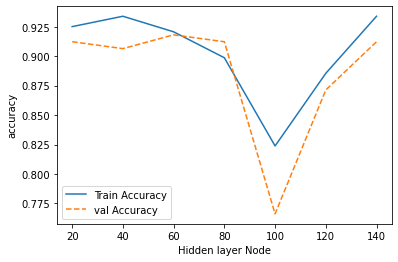

In [41]:

plt.plot(para_hidden,train_acc, linestyle='-', label='Train Accuracy')
plt.plot(para_hidden,val_acc, linestyle='--' , label='val Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Hidden layer Node')
plt.legend()

###  히든레이어 2개를 이용하여 20~ 140 개의 노드를 사용하여 학습한 결과 히든레이어 1개보다 더욱 성능이 낮았고 100개의 노드를 사용하였을 때는 오히려 심하게 정확도가 감소하는 것을 볼 수 있었다. 따라서 현재 유방암데이터에서는 히든레이어 하이퍼파라미터를 은닉층 1개 와 70개의 노드를 사용하여 진행한다.

# MLPClassifier 모델 활성화함수(Activation) 하이퍼파라미터 

In [42]:
train_acc, val_acc = [], [] 
# 학습한 train 정확도와 validation 정확도를 담기위한 리스트 선언
para_func = ['logistic','tanh','relu']


for func in para_func:
    nn=MLPClassifier(hidden_layer_sizes = 70,activation=func, random_state =1234)
    nn.fit(df_train_x, df_train_y)
    train_acc.append(nn.score(df_train_x,df_train_y))
    val_acc.append(nn.score(df_val_x,df_val_y))
# 위에서 선언한 리스트들을 각각 훈련데이터를 이용하여 훈련시키고 리스트에 append를 이용하여 확장시킨다.

df_acc_func =pd.DataFrame()
df_acc_func["Activation Function"]=para_func
df_acc_func["trainAccuarcy"]=train_acc
df_acc_func['valacc']=val_acc
# 데이터 저장    

In [43]:
df_acc_func

,Activation Function,trainAccuarcy,valacc
0,logistic,0.920705,0.912281
1,tanh,0.920705,0.923977
2,relu,0.925110,0.935673


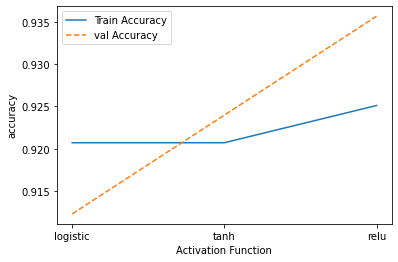

In [44]:
plt.plot(para_func,train_acc, linestyle='-', label='Train Accuracy')
plt.plot(para_func,val_acc, linestyle='--' , label='val Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Activation Function')
plt.legend()

### 하이퍼파라미터 활성화 함수의 변화에 따른 학습률을 확인해 본 결과 relu 함수의 학습률이 제일 높았다 .
### Relu 함수에 대하여 간단하게 설명해보자면 Relu함수는 0이하 일 때는 전부 0을 출력하고 0 이상일때는 y=x 인 즉 입력값이 출력값이 되는 함수이다. 

### 따라서  활성화 함수 하이퍼 파라미터로 relu 함수를 선택하였다.

#  Scale 변환 

In [45]:
feature_name = df_train_x.columns
scaler= StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled,columns=feature_name)
df_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


### 스케일 후 설명변수에 대한 데이터 분리

In [46]:
# train : validation : test = 4:3:3 비율로 나눔
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled,test_size=0.3,random_state=1234)
df_scaled_train_x,df_scaled_val_x= train_test_split(df_scaled_train_x,test_size = 3/7,random_state=1234)


In [47]:
print(df_scaled_train_x.shape)
print(df_scaled_val_x.shape)
print(df_scaled_test_x.shape)

(227, 30)
(171, 30)
(171, 30)


In [48]:
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x,df_train_y)
print(" 훈련 데이터 셋 정확도 : {:.3f}".format(nn_scaled.score(df_scaled_train_x,df_train_y)))
print(" 검증 데이터 셋 정확도 : {:.3f}".format(nn_scaled.score(df_scaled_val_x,df_val_y)))

 훈련 데이터 셋 정확도 : 0.996
 검증 데이터 셋 정확도 : 0.959


C:\Users\nsh65\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 정확도에 대한 설명하기 전에 스케일 전과 후의 비교를 해보자면 스케일 후의 정확도가 더 높게 나왔다. 스케일 조정(전처리) 을 통하여 학습이 더 잘된다는 결과를 한번 더 확인 할 수 있는 기회였다.

In [49]:
train_acc, val_acc = [], [] 
# 학습한 train 정확도와 validation 정확도를 담기위한 리스트 선언
para_hidden = [20* hidden for hidden in range(1,11)]
# 인공신경망 모델에서 사용하는 히든레이어 에 노드를 20부터 200까지 20 단위로 총 10개 변수를 리스트컴프리헨션으로 선언

for hidden in para_hidden:
    nn=MLPClassifier(hidden_layer_sizes = hidden, random_state =1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_acc.append(nn.score(df_scaled_train_x,df_train_y))
    val_acc.append(nn.score(df_scaled_val_x,df_val_y))
# 위에서 선언한 리스트들을 각각 훈련데이터를 이용하여 훈련시키고 리스트에 append를 이용하여 확장시킨다.

df_acc_hidden =pd.DataFrame()
df_acc_hidden["Hidden layer"]=para_hidden
df_acc_hidden["trainAccuarcy"]=train_acc
df_acc_hidden['valacc']=val_acc
# 데이터 저장    

C:\Users\nsh65\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nsh65\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nsh65\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nsh65\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nsh65\anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [50]:
df_acc_hidden.round(3)

,Hidden layer,trainAccuarcy,valacc
0,20,0.996,0.982
1,40,0.996,0.971
2,60,0.996,0.971
3,80,0.996,0.971
4,100,0.996,0.959
5,120,0.996,0.965
6,140,0.996,0.965
7,160,1.000,0.953
8,180,0.996,0.971
9,200,0.996,0.959


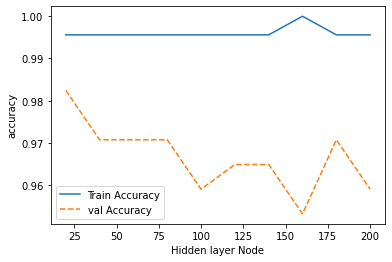

In [51]:
plt.plot(para_hidden,train_acc, linestyle='-', label='Train Accuracy')
plt.plot(para_hidden,val_acc, linestyle='--' , label='val Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Hidden layer Node')
plt.legend()

###  은닉층 1개로 20부터 200개의 노드들의 학습률을 본 결과 학습률이 저하되는 모습을 보였다. 이에 따라 추가로 은닉층 2개의 학습률을 확인해본다.

In [52]:
train_acc, val_acc = [], [] 
# 학습한 train 정확도와 validation 정확도를 담기위한 리스트 선언
para_hidden = [20* hidden for hidden in range(1,11)]
# 인공신경망 모델에서 사용하는 히든레이어 에 노드를 20부터 200까지 20 단위로 총 10개 변수를 리스트컴프리헨션으로 선언

for hidden in para_hidden:
    nn=MLPClassifier(hidden_layer_sizes = (hidden,hidden), random_state =1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_acc.append(nn.score(df_scaled_train_x,df_train_y))
    val_acc.append(nn.score(df_scaled_val_x,df_val_y))
# 위에서 선언한 리스트들을 각각 훈련데이터를 이용하여 훈련시키고 리스트에 append를 이용하여 확장시킨다.

df_acc_hidden =pd.DataFrame()
df_acc_hidden["Hidden layer"]=para_hidden
df_acc_hidden["trainAccuarcy"]=train_acc
df_acc_hidden['valacc']=val_acc
# 데이터 저장    

C:\Users\nsh65\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [53]:
df_acc_hidden.round(3)

,Hidden layer,trainAccuarcy,valacc
0,20,0.996,0.965
1,40,0.996,0.977
2,60,1.000,0.965
3,80,1.000,0.977
4,100,1.000,0.971
5,120,1.000,0.953
6,140,1.000,0.965
7,160,1.000,0.953
8,180,1.000,0.959
9,200,1.000,0.953


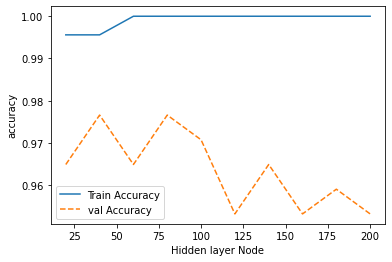

In [54]:
plt.plot(para_hidden,train_acc, linestyle='-', label='Train Accuracy')
plt.plot(para_hidden,val_acc, linestyle='--' , label='val Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Hidden layer Node')
plt.legend()

### 히든레이어가 2개일 때도 1개일 때와 마찬가지로 노드의 수가 많아지면 많아질 수록 학습률이 저하되는 모습을 보였지만 히든레이어 2개일 때 검증데이터의 정확도가 더 높아 히든레이어 2개로 선택하고 노드의 수는 80개로 모델링을 진행한다.

In [55]:
train_acc, val_acc = [], [] 
# 학습한 train 정확도와 validation 정확도를 담기위한 리스트 선언
para_func = ['logistic','tanh','relu']


for func in para_func:
    nn=MLPClassifier(hidden_layer_sizes = (80,80),activation=func, random_state =1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_acc.append(nn.score(df_scaled_train_x,df_train_y))
    val_acc.append(nn.score(df_scaled_val_x,df_val_y))
# 위에서 선언한 리스트들을 각각 훈련데이터를 이용하여 훈련시키고 리스트에 append를 이용하여 확장시킨다.

df_acc_func =pd.DataFrame()
df_acc_func["Activation Function"]=para_func
df_acc_func["trainAccuarcy"]=train_acc
df_acc_func['valacc']=val_acc
# 데이터 저장    

C:\Users\nsh65\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [56]:
df_acc_func.round(3)

,Activation Function,trainAccuarcy,valacc
0,logistic,0.996,0.965
1,tanh,1.000,0.959
2,relu,1.000,0.977


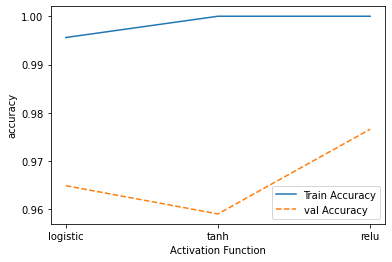

In [57]:
plt.plot(para_func,train_acc, linestyle='-', label='Train Accuracy')
plt.plot(para_func,val_acc, linestyle='--' , label='val Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Activation Function')
plt.legend()

###  스케일링하기 전 과 동일하다는 점은 Relu 함수의 정확도가 제일 높게 나온다는 점이다. 따라서 Relu 함수를 선택하여 모델링을 계속 진행한다.

In [58]:
train_acc, val_acc = [], [] 
# 학습한 train 정확도와 validation 정확도를 담기위한 리스트 선언
para_solver = ['lbfgs','sgd','adam']


for solvers in para_solver:
    nn=MLPClassifier(hidden_layer_sizes = (80,80),activation='relu',solver=solvers , random_state =1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_acc.append(nn.score(df_scaled_train_x,df_train_y))
    val_acc.append(nn.score(df_scaled_val_x,df_val_y))
# 위에서 선언한 리스트들을 각각 훈련데이터를 이용하여 훈련시키고 리스트에 append를 이용하여 확장시킨다.

df_acc_solver =pd.DataFrame()
df_acc_solver["Solver"]=para_solver
df_acc_solver["trainAccuarcy"]=train_acc
df_acc_solver['valacc']=val_acc
# 데이터 저장    

C:\Users\nsh65\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [59]:
df_acc_solver

,Solver,trainAccuarcy,valacc
0,lbfgs,1.000000,0.947368
1,sgd,0.995595,0.970760
2,adam,1.000000,0.976608


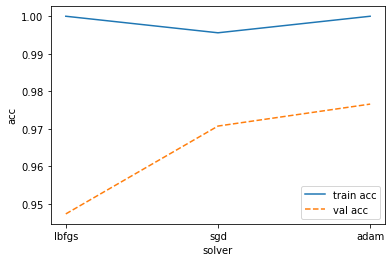

In [60]:
plt.plot(para_solver,train_acc,linestyle='-',label='train acc')
plt.plot(para_solver,val_acc,linestyle='--',label ='val acc')
plt.xlabel("solver")
plt.ylabel('acc')
plt.legend()

### solver( 가중치 최적화 변경 )을 확인해본 결과 ADAM 이 가장 높은 정확도를 보여줬다. 수업시간에 교수님이 요즘은 ADAM이 대세라고 하며 다음에는 이브가 대세일 것이라고 썰렁 개그를 하셔서 .. 기억에 남는다 ㅎㅎ.. ADAM이 대세인 이유를 과제를 통하여 한번 더 확인하는 계기가 되어 머리속에 오래 남을 것같다.

In [61]:
train_acc, val_acc = [], [] 
# 학습한 train 정확도와 validation 정확도를 담기위한 리스트 선언
para_batch = [5 * batch for batch in range(1,20)]

for batch in para_batch:
    nn=MLPClassifier(hidden_layer_sizes = (80,80),activation='relu',solver='adam',batch_size=batch , random_state =1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_acc.append(nn.score(df_scaled_train_x,df_train_y))
    val_acc.append(nn.score(df_scaled_val_x,df_val_y))
# 위에서 선언한 리스트들을 각각 훈련데이터를 이용하여 훈련시키고 리스트에 append를 이용하여 확장시킨다.

df_acc_batch =pd.DataFrame()
df_acc_batch["Batch"]=para_batch
df_acc_batch["trainAccuarcy"]=train_acc
df_acc_batch['valacc']=val_acc
# 데이터 저장    

In [62]:
df_acc_batch.round(3)

,Batch,trainAccuarcy,valacc
0,5,1.0,0.971
1,10,1.0,0.971
2,15,1.0,0.977
3,20,1.0,0.971
4,25,1.0,0.971
5,30,1.0,0.971
6,35,1.0,0.977
7,40,1.0,0.971
8,45,1.0,0.977
9,50,1.0,0.971


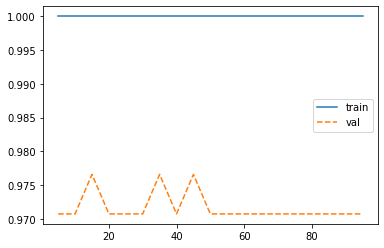

In [63]:
plt.plot(para_batch,train_acc,linestyle='-',label='train')
plt.plot(para_batch,val_acc,linestyle='--',label='val')
plt.legend()

###  훈련 데이터셋은 과적합 경향을 나타냈고 batch사이즈 의 크기가 증가할수록 오차 증가 경향성이 있어서 batch 사이즈는 50으로 선택하였다.. batchsize를 잠시 복기해보자면 학습할 데이터를 등분하여 각 배치데이터를 순차적으로 실행하는 방법이다!

#  최종 모델 선택

In [64]:
nn_final=MLPClassifier(hidden_layer_sizes = (80,80),activation='relu',solver='adam',batch_size=50 , random_state =1234)

nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)

print('훈련 데이터 셋의 정확도 : {:.3f}'.format(nn_final.score(df_scaled_train_x,df_train_y)))
print('테스트 데이터 셋의 정확도: {:.3f}'.format(nn_final.score(df_scaled_test_x,df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y,y_pred)))

훈련 데이터 셋의 정확도 : 1.000
테스트 데이터 셋의 정확도: 0.947
Confusion matrix : 
[[103   2]
 [  7  59]]


### 최종모델에 대한 결론: 훈련 데이터셋은 과적합 되어있고 훈련과 검증때 사용하지 않은 한번도 다루지 않은 test셋을 넣어서 정확도가 0.947이 나왔다. 학습 할 때 검증하였던 정확도 0.977 대비 3%가 감소하였다.  Confusion matrix에 대한 해석을 해보자면 유방암이라고 예측했을 때 맞은 결과는 103개였고 아닌경우는 2가지가 나왔다. 또한 유방암이 아니라고 예측했는데 실제 유방암인 결과 7개가 있었다. 

# KNN (가장 근접한 k-이웃의 값을 평균해서 예측하거나 빈도가 많은 클래스로 분류하는 탐색적 기법)

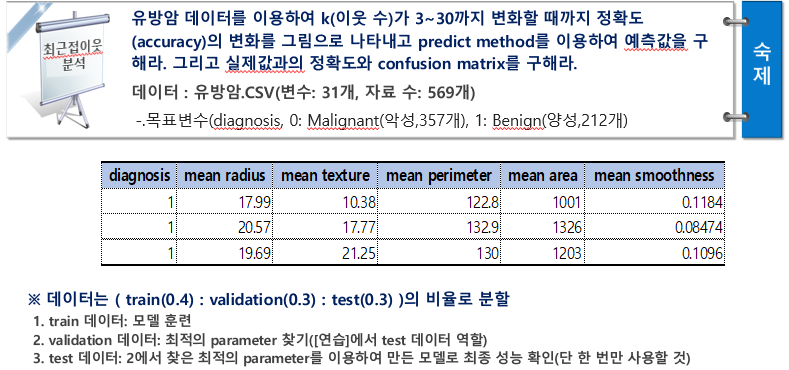

# 모듈은 맨 위에 import 해서 생략

## 1. 데이터 불러오기

In [65]:
# 실습실경로 df=pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/유방암.csv")
df=pd.read_csv("C:/Users/nsh65/Documents/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/유방암.csv")
df.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##  데이터 결측 확인

In [66]:
df.isnull().sum()
# 결측치 확인

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [67]:
df_x = df.drop('diagnosis',axis=1)
df_y = df['diagnosis']

In [68]:
df_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [69]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
df_train_x,df_val_x,df_train_y,df_val_y=train_test_split(df_train_x,df_train_y,test_size=3/7,random_state=1234)

In [70]:
print(df_train_x.shape)
print(df_train_y.shape)
print(df_val_x.shape)
print(df_val_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

# 데이터를 train : validation : test 비율을 4:3:3 으로 맞춰서 나누어줬다.

(227, 30)
(227,)
(171, 30)
(171,)
(171, 30)
(171,)


## 데이터 스케일링 

In [71]:
feature_name = df_train_x.columns
scaler= StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled,columns=feature_name)
df_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [72]:

#   스케일링 된 데이터를 train : validation : test = 4:3:3 비율로 나눔
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled,test_size=0.3,random_state=1234)
df_scaled_train_x,df_scaled_val_x= train_test_split(df_scaled_train_x,test_size = 3/7,random_state=1234)


In [73]:
print(df_scaled_train_x.shape)
print(df_scaled_val_x.shape)
print(df_scaled_test_x.shape)

(227, 30)
(171, 30)
(171, 30)


## 기본 옵션 모델 생성

In [74]:
knn_scaled= KNeighborsClassifier()

In [75]:
knn_scaled.fit(df_scaled_train_x,df_train_y)

print("훈련 데이터셋 정확도:{:.3f}".format(knn_scaled.score(df_scaled_train_x,df_train_y)))
print("검증 데이터셋 정확도:{:.3f}".format(knn_scaled.score(df_scaled_val_x,df_val_y)))

훈련 데이터셋 정확도:0.978
검증 데이터셋 정확도:0.953


###  훈련데이터와 검증 데이터의 성능이 2.5% 차이로 유사한 수준이지만 훈련데이터 셋이 다소 과적합 되어있다고 판단됨

In [76]:

para_neibor = [i for i in range(3,31)]
# 문제에서 요구한 사항대로 이웃의 수를 3~ 30 으로 설정하였다.

train_acc = []; val_acc = [];

for n_neibors in para_neibor:
    clf = KNeighborsClassifier(n_neighbors=n_neibors)
    clf.fit(df_scaled_train_x,df_train_y)
    train_acc.append(clf.score(df_scaled_train_x,df_train_y))
    val_acc.append(clf.score(df_scaled_val_x,df_val_y))
    
df_neibors = pd.DataFrame()
df_neibors["Neighbors"] = para_neibor
df_neibors["TrainAccuracy"] = train_acc
df_neibors["ValAccuracy"] = val_acc
df_neibors.round(3)

,Neighbors,TrainAccuracy,ValAccuracy
0,3,0.974,0.953
1,4,0.974,0.947
2,5,0.978,0.953
3,6,0.960,0.953
4,7,0.974,0.953
5,8,0.969,0.959
6,9,0.974,0.959
7,10,0.969,0.965
8,11,0.974,0.965
9,12,0.969,0.965


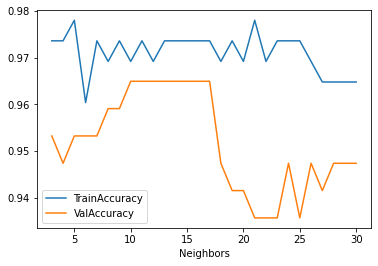

In [77]:
df_neibors.set_index('Neighbors', inplace=False).plot.line()

### 이웃수(3 ~ 30)에 따른 정확도 변화로 알 수 있는것은 이웃이 (3 ~ 10)일때는  검증 데이터셋의 정확도가 증가하는 것을 알 수 있고 이웃이 15일 때부터 검증 데이터셋의 정확도가 급감하는 것을 알 수 있다. 따라서 이웃의 수는 10~14로 설정한다고 판단하였다.


## 가중치 하이퍼파라미터 설정 (해석은 피봇테이블 밑에..)

In [78]:
para_weight = ["uniform"] * 28 + ["distance"] * 28
para_neibor = [i for i in range(3,31)]*2
# 문제에서 요구한 사항대로 이웃의 수를 3~ 30 으로 설정하였다.

train_acc = [] 
val_acc = []

for (n_neibors,n_weight) in zip(para_neibor,para_weight):
    clf = KNeighborsClassifier(n_neighbors=n_neibors,weights=n_weight)
    clf.fit(df_scaled_train_x,df_train_y)
    train_acc.append(clf.score(df_scaled_train_x,df_train_y))
    val_acc.append(clf.score(df_scaled_val_x,df_val_y))

df_neibors = pd.DataFrame()
df_neibors["Neighbors"] = para_neibor
df_neibors["Weights"]= para_weight
df_neibors["TrainAccuracy"] = train_acc
df_neibors["ValAccuracy"] = val_acc
df_neibors.round(3)

,Neighbors,Weights,TrainAccuracy,ValAccuracy
0,3,uniform,0.974,0.953
1,4,uniform,0.974,0.947
2,5,uniform,0.978,0.953
3,6,uniform,0.960,0.953
4,7,uniform,0.974,0.953
5,8,uniform,0.969,0.959
6,9,uniform,0.974,0.959
7,10,uniform,0.969,0.965
8,11,uniform,0.974,0.965
9,12,uniform,0.969,0.965


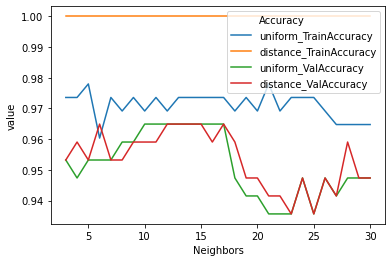

In [79]:
df_neibors_melt = pd.melt(df_neibors,id_vars=["Neighbors","Weights"])
df_neibors_melt["Accuracy"] = df_neibors_melt["Weights"] + "_" + df_neibors_melt["variable"]

ax = sns.lineplot(x = "Neighbors",y = "value", hue = "Accuracy", data = df_neibors_melt )

In [80]:
#그림을 그리기 위해 데이터의 형태를 pivot으로 변환
df_accuracy_weights_pivot = df_neibors.pivot(index = 'Neighbors', columns = 'Weights',\
                                                      values = ['TrainAccuracy', 'ValAccuracy'])


#pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + '_' + level1
df_accuracy_weights_pivot



,TrainAccuracy_distance,TrainAccuracy_uniform,ValAccuracy_distance,ValAccuracy_uniform
Neighbors,,,,
3,1.0,0.973568,0.953216,0.953216
4,1.0,0.973568,0.959064,0.947368
5,1.0,0.977974,0.953216,0.953216
6,1.0,0.960352,0.964912,0.953216
7,1.0,0.973568,0.953216,0.953216
8,1.0,0.969163,0.953216,0.959064
9,1.0,0.973568,0.959064,0.959064
10,1.0,0.969163,0.959064,0.964912
11,1.0,0.973568,0.959064,0.964912


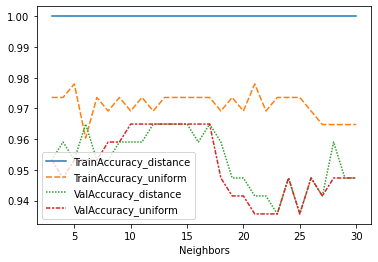

In [81]:
sns.lineplot(data=df_accuracy_weights_pivot)

### 가중치가 distance 일때 훈련데이터는 과대적합 이다. 그러므로 가중치를 uniform으로 선택하여 knn 모델을 계속 진행해본다.

## 거리 계산 방법별 하이퍼 파라미터 설정

In [82]:
para_metric = ["minkowski"] * 28 + ["euclidean"] * 28 + ["manhattan"] * 28
para_neibor = [i for i in range(3,31)]*3
# 문제에서 요구한 사항대로 이웃의 수를 3~ 30 으로 설정하였다.

train_acc = [] 
val_acc = []

for (n_neibors,n_dis) in zip(para_neibor,para_metric):
    clf = KNeighborsClassifier(n_neighbors=n_neibors,weights='uniform',metric=n_dis)
    clf.fit(df_scaled_train_x,df_train_y)
    train_acc.append(clf.score(df_scaled_train_x,df_train_y))
    val_acc.append(clf.score(df_scaled_val_x,df_val_y))

df_metric = pd.DataFrame()
df_metric["Neighbors"] = para_neibor
df_metric["Metric"]= para_metric
df_metric["TrainAccuracy"] = train_acc
df_metric["ValAccuracy"] = val_acc
df_metric.round(3)

,Neighbors,Metric,TrainAccuracy,ValAccuracy
0,3,minkowski,0.974,0.953
1,4,minkowski,0.974,0.947
2,5,minkowski,0.978,0.953
3,6,minkowski,0.960,0.953
4,7,minkowski,0.974,0.953
...,...,...,...,...
79,26,manhattan,0.974,0.947
80,27,manhattan,0.974,0.947
81,28,manhattan,0.969,0.947
82,29,manhattan,0.969,0.947


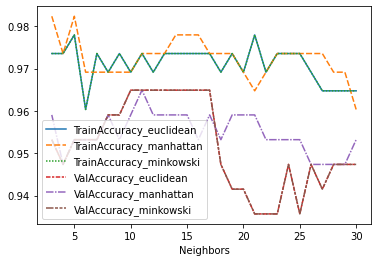

In [83]:


#정확도 그래프
df_accuracy_metric_pivot = df_metric.pivot(index="Neighbors",columns="Metric",
                                                   values=["TrainAccuracy","ValAccuracy"])

level0=df_accuracy_metric_pivot.columns.get_level_values(0)
level1=df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns=level0+"_"+level1
sns.lineplot(data=df_accuracy_metric_pivot)

## 위에서 우리는 이웃을 14로 정하자고 선택하였다. 그러므로 이웃이 14를 기준으로 그래프를 해석해 보자면 euclidean 방법을 사용했을때 과소적합,과대적합을 사이에 최적점으로 해석할 수 있다. manhattan 방법에서는 3 ~ 30 사이의 이웃중에 14의 이웃이 제일 최적점이지만 euclidean방법이 조금더 높은 정확도를 갖는다고 판단할 수 있다.

#  결론도출

In [84]:
#최종모델
knn_model = KNeighborsClassifier(n_neighbors=14,weights="uniform",metric="euclidean")
knn_model.fit(df_scaled_train_x,df_train_y)
#평가
y_pred=knn_model.predict(df_scaled_test_x)

#train 데이터 셋 정확도
print(" 훈련 데이터셋 정확도 :{0:.3f}".format(knn_model.score(df_scaled_train_x,df_train_y)))
#test 데이터 셋 정확도
print("테스트 데이터셋 정확도:{0:.3f}".format(knn_model.score(df_scaled_test_x,df_test_y)))
#confusion matrix
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

 훈련 데이터셋 정확도 :0.974
테스트 데이터셋 정확도:0.918
Confusion matrix:
[[105   0]
 [ 14  52]]


### 결론을 해석해보자면 나름 최적점의 하이퍼파라미터설정을 통하여 모델을 만들었지만 테스트 데이터셋을 이용하여 정확도를 확인해본 결과 여전히 Train 데이터의 과적합이 존재하였다. Confusion matrix를 해석해보자면 실제유방암인데 유방암이 아니라고 예측한것은 0이였다. 실제 유방암이 없는데 있다고 예측한 데이터는 14개가 존재하였다. 이 경우에는 머신러닝의 모델 평가적 결론으로는 완벽한 모델은 아니지만 인간적인 면모로 다가갔을 때는  다행인 것 같다. 유방암이 실제로 있는데 없다고 판단 내리는 것보다 유방암이 없는데 있다고 하는 것이 실질적으로 암이 아니기 때문이다..ㅎ 머신러닝의 정확도 밀당은 쉽지않다... 과대적합과 과소적합의 줄다리기와 같다고 표현하면 딱 일치하는 표현같다. 